## Problem Statement
-- To predict the price range of  the mobile phones on the basis of the mobile Specification like Battery power, 3G enabled ,
wifi ,Bluetooth, Ram etc..

#### Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

import pickle

In [2]:
cp = pd.read_csv("phone.csv")

## Basic Checks

In [3]:
cp

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


## Data Fields

In [4]:
cp.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [5]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

<Axes: ylabel='count'>

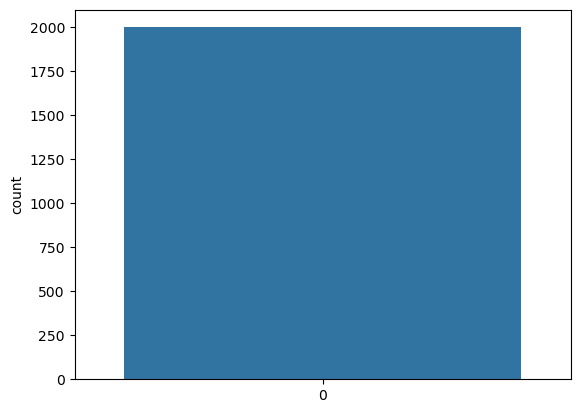

In [6]:
sns.countplot(cp['price_range'])

In [7]:
cp.shape

(2000, 21)

In [8]:
cp.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## Data Visualization 

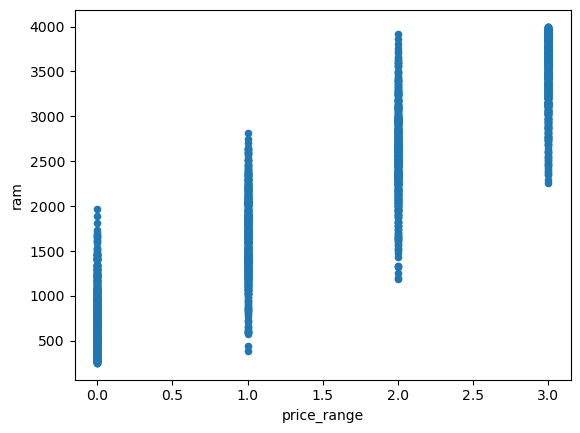

In [9]:
cp.plot(x='price_range',y='ram',kind='scatter')
plt.show()

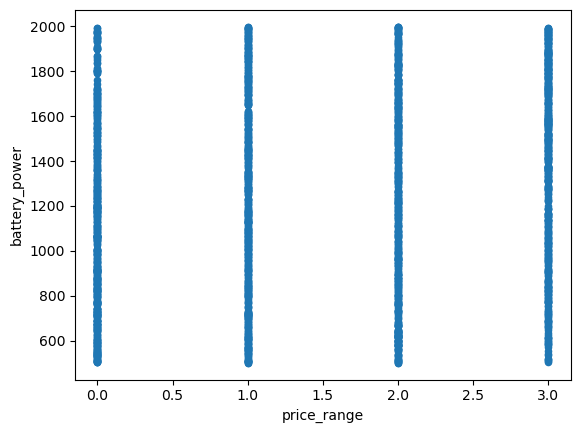

In [10]:
cp.plot(x='price_range',y='battery_power',kind='scatter')
plt.show()

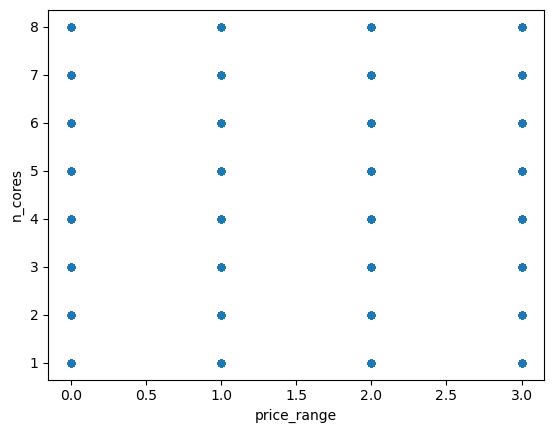

In [11]:
cp.plot(x='price_range',y='n_cores',kind='scatter')
plt.show()

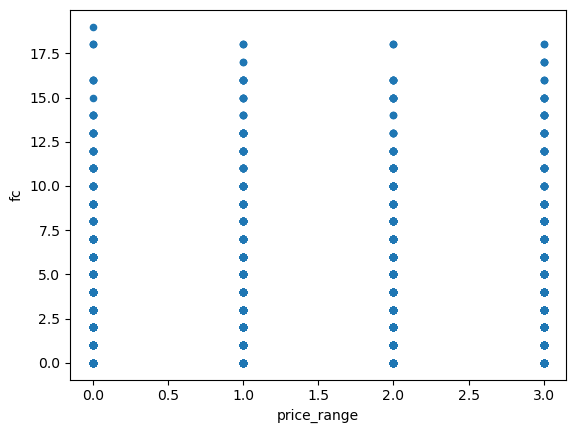

In [12]:
cp.plot(x='price_range',y='fc',kind='scatter')
plt.show()

<Axes: >

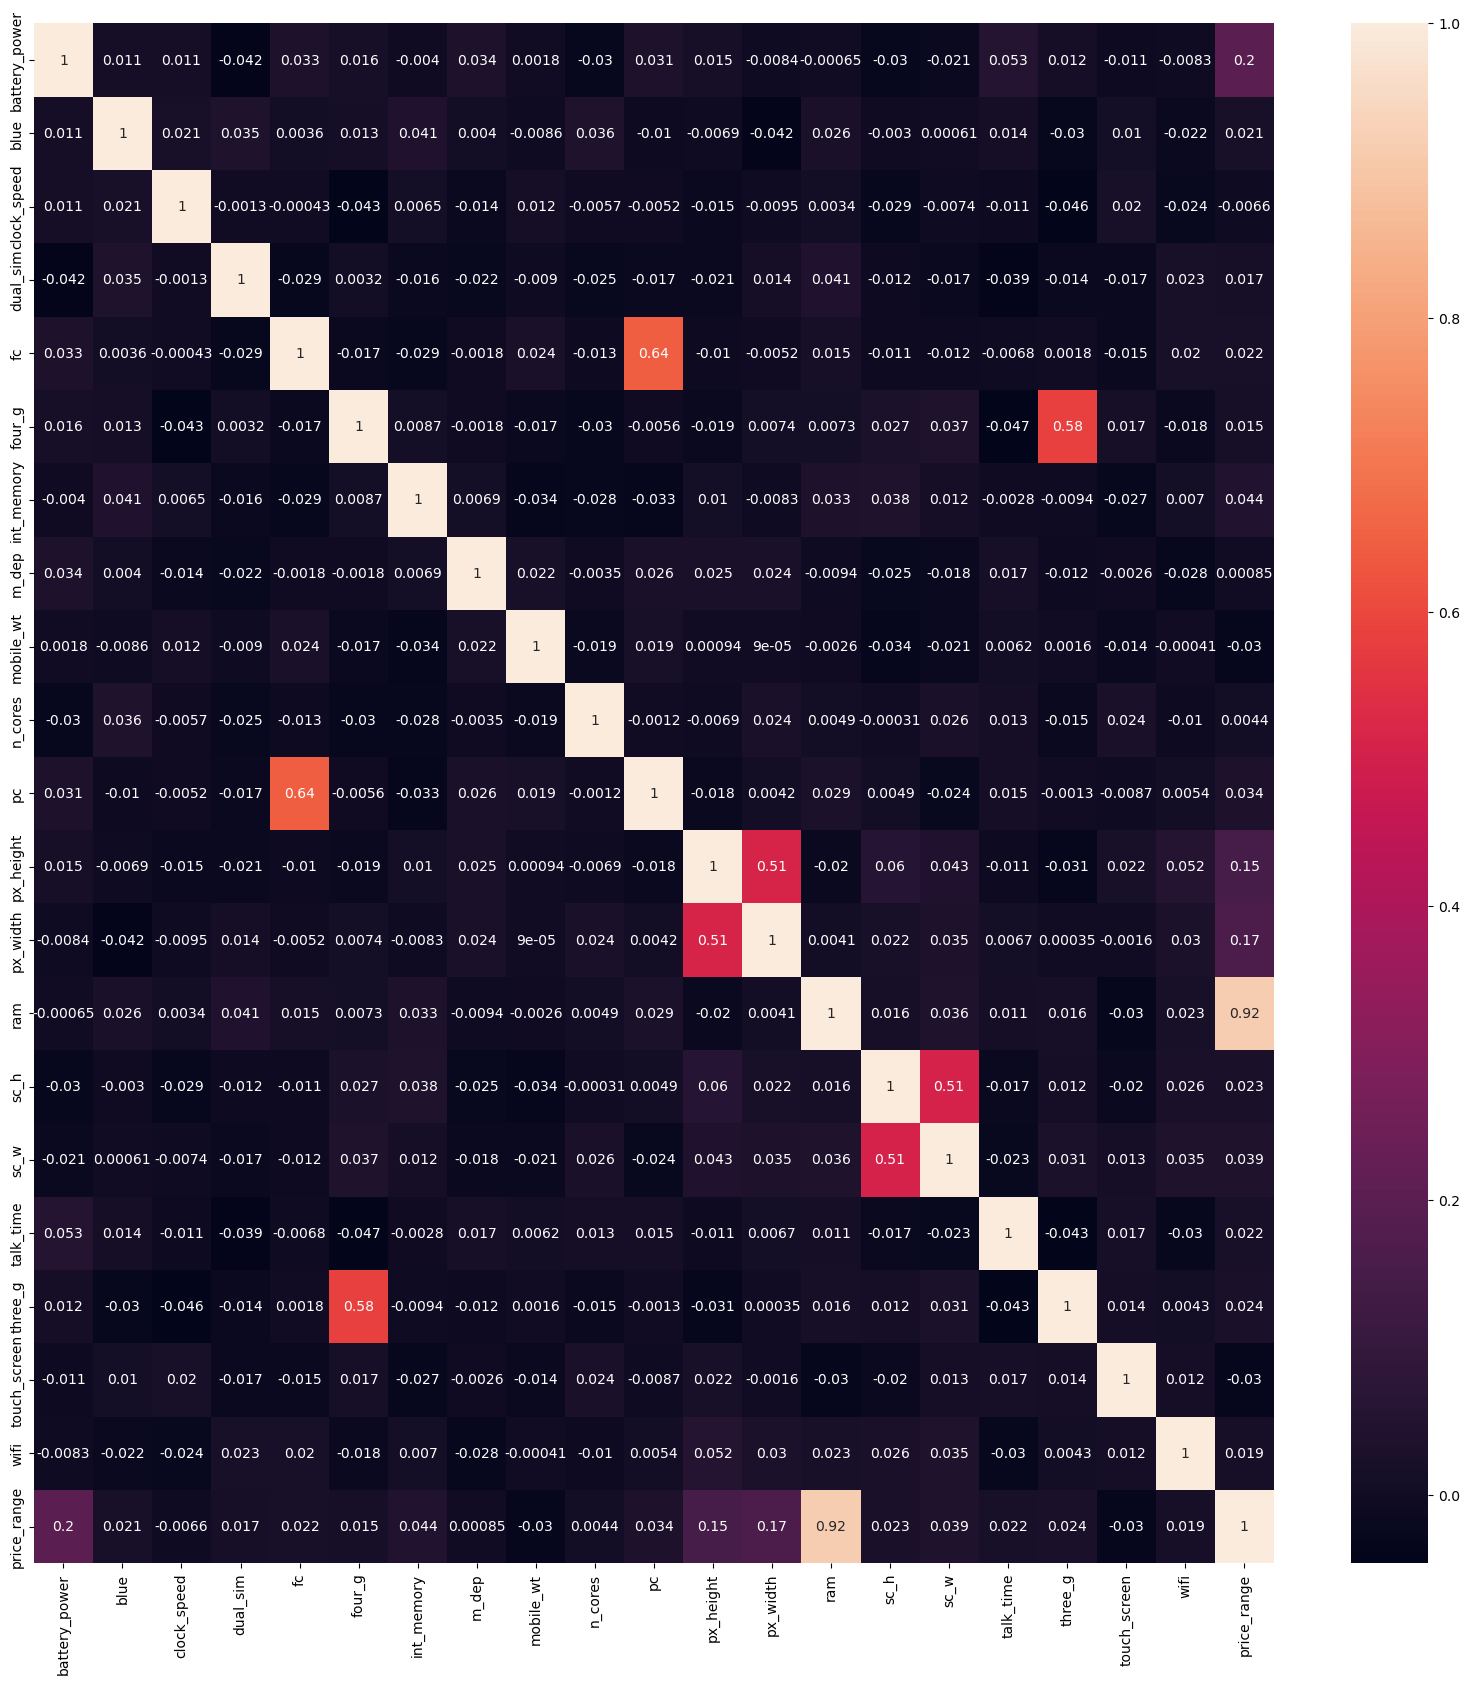

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(cp.corr(),annot=True)

## Exploratory Data Analysis

In [14]:
columns = ['battery_power','blue','clock_speed','dual_sim','fc','four_g','int_memory','m_dep', 'mobile_wt','n_cores','pc','px_height','ram','sc_h','sc_w','talk_time','three_g','touch_screen','wifi','price_range']
# Specifying all the columns in a single column.

### Univariate Analysis

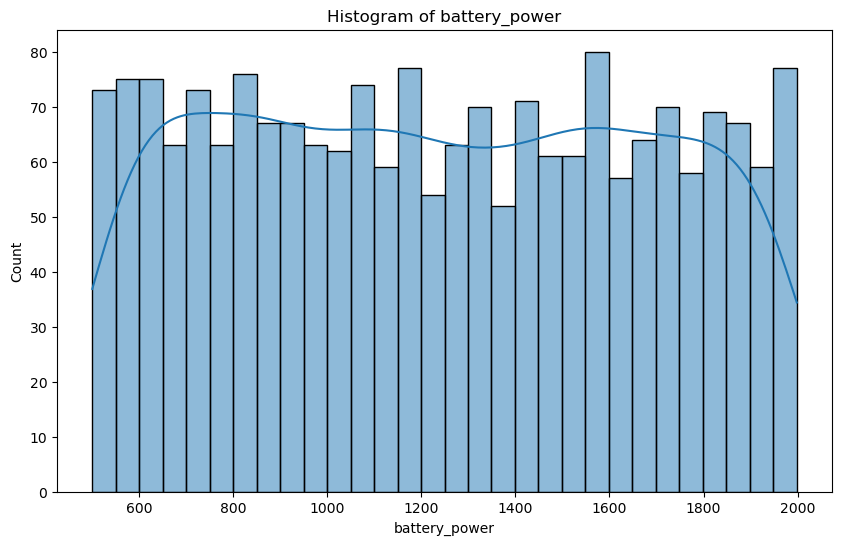

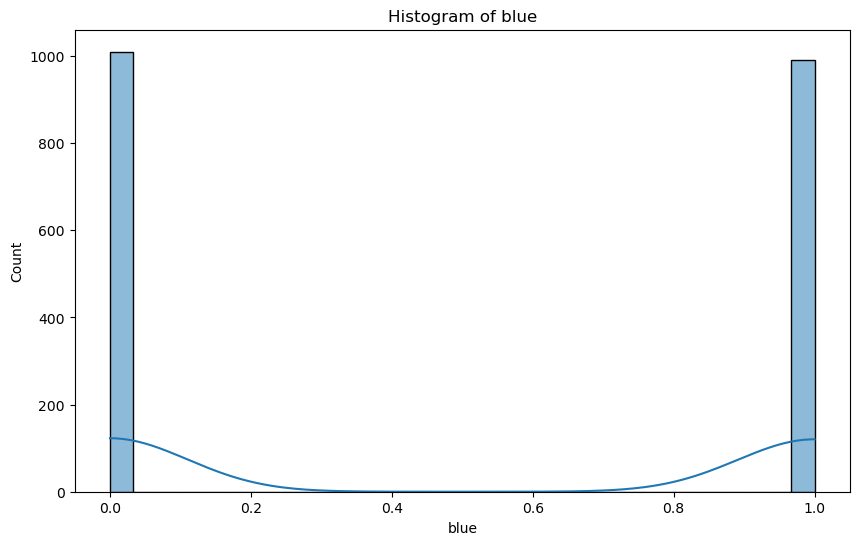

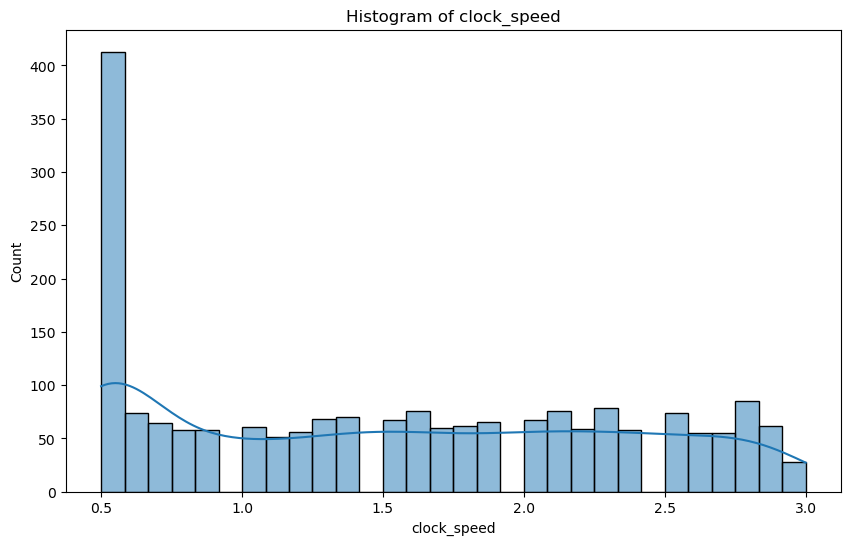

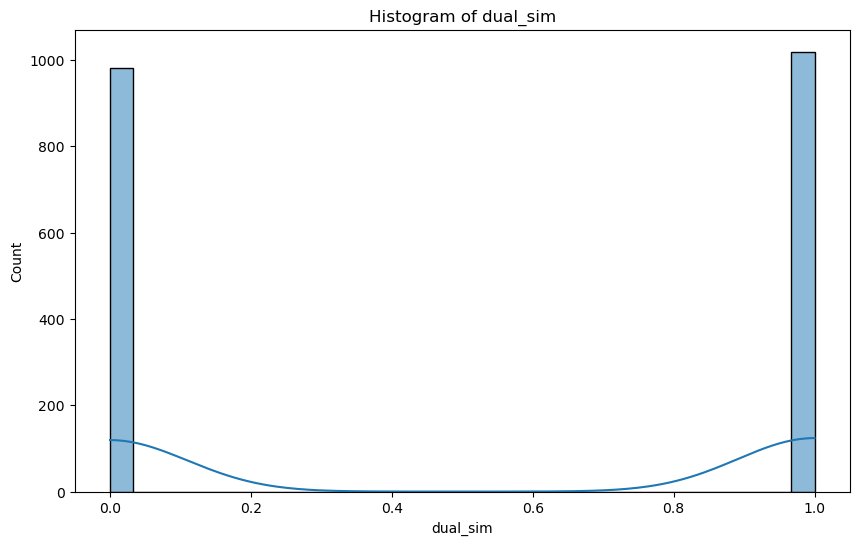

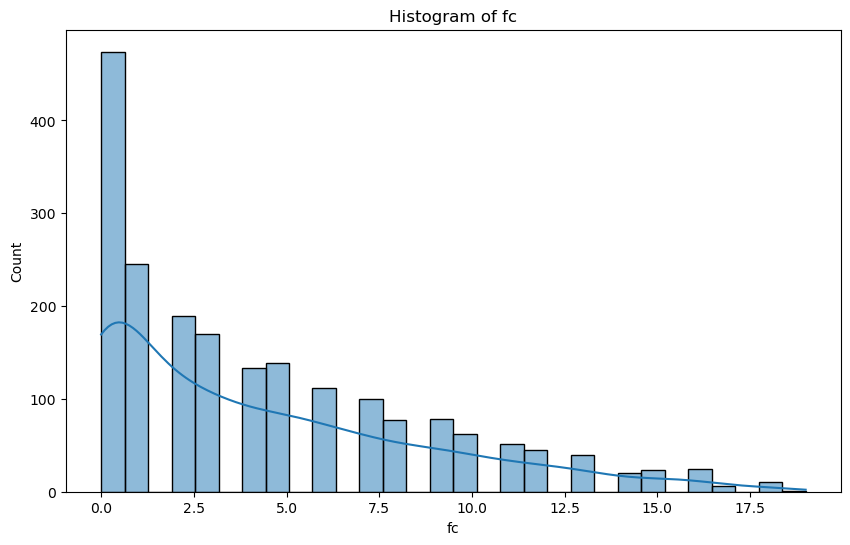

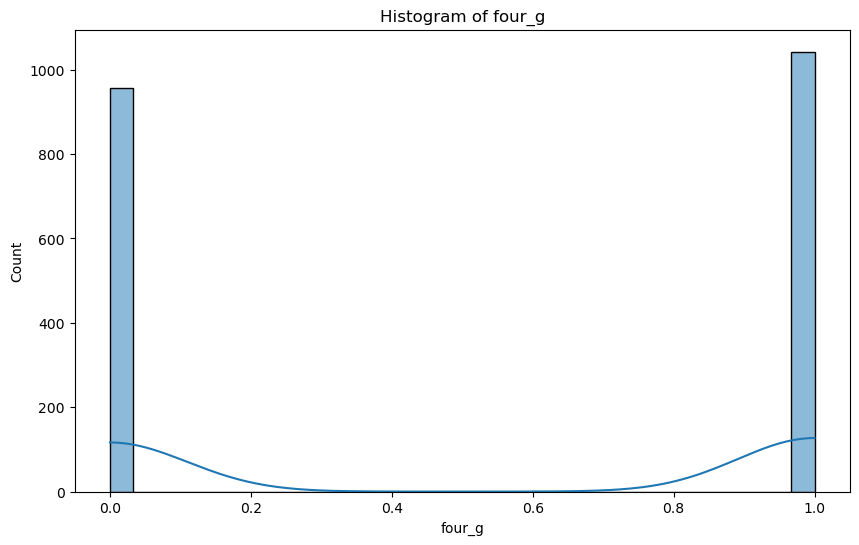

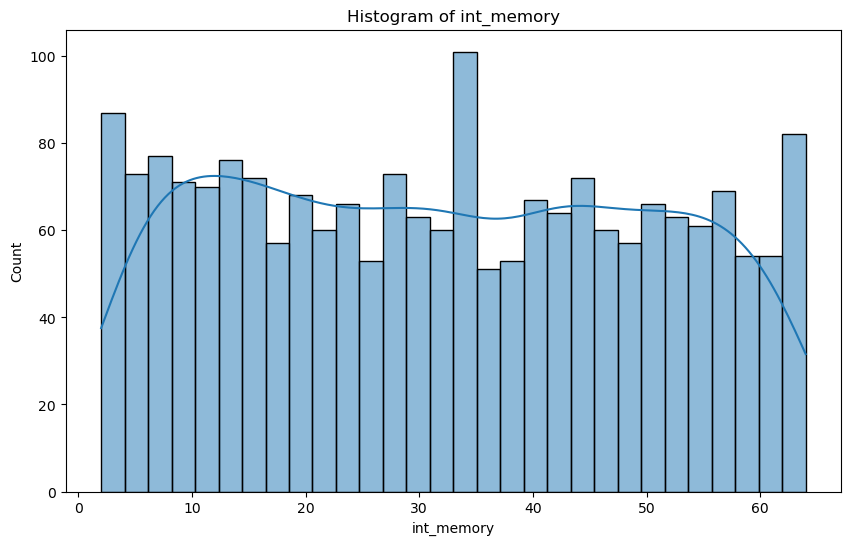

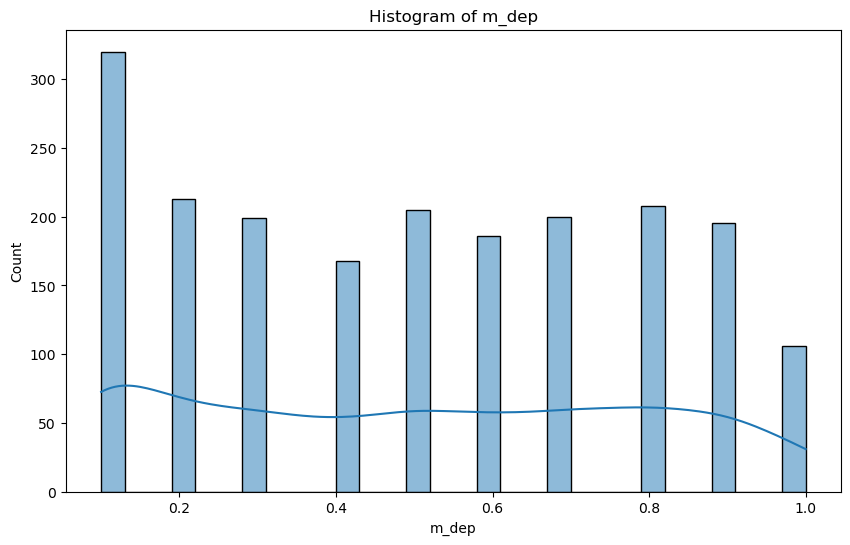

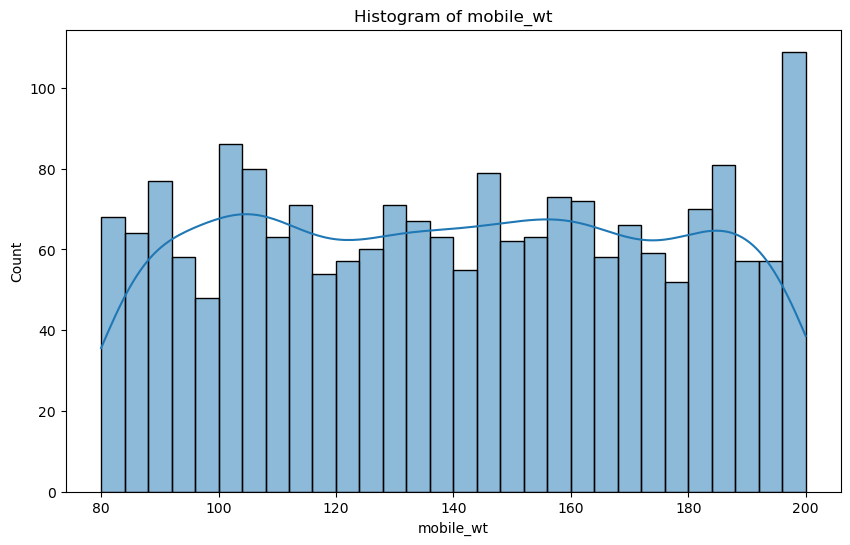

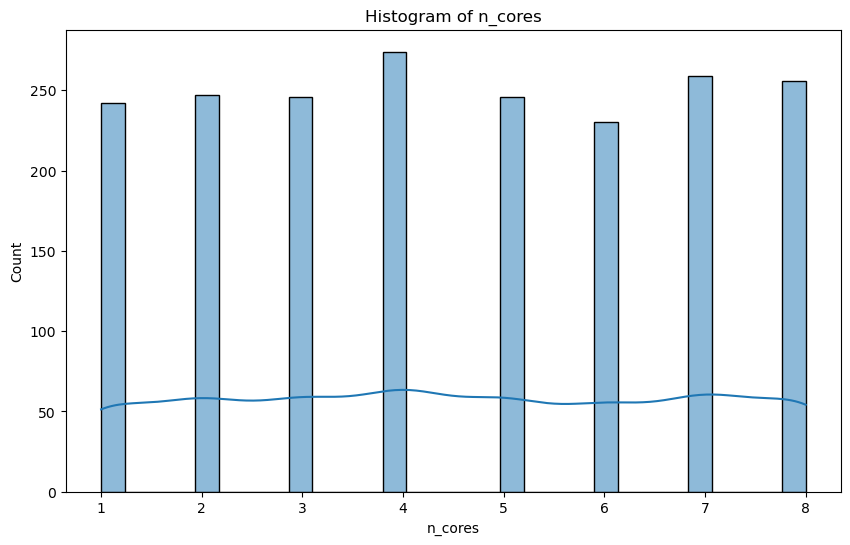

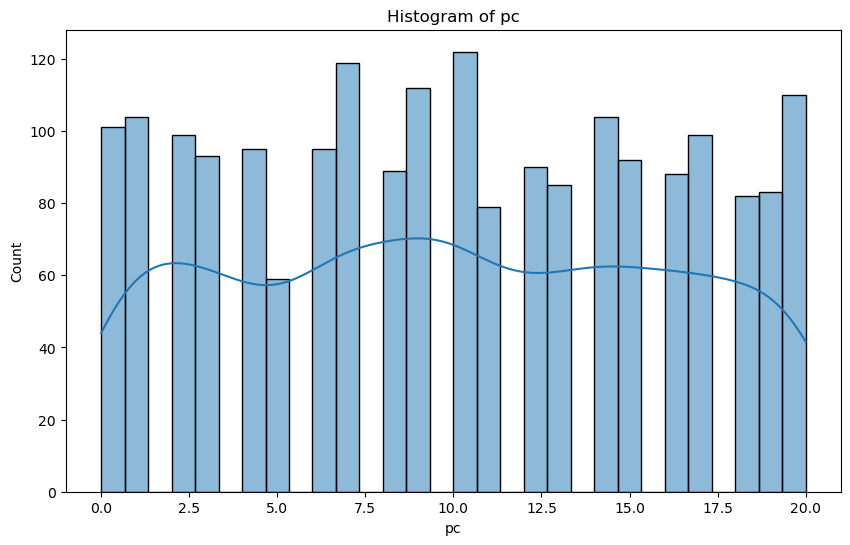

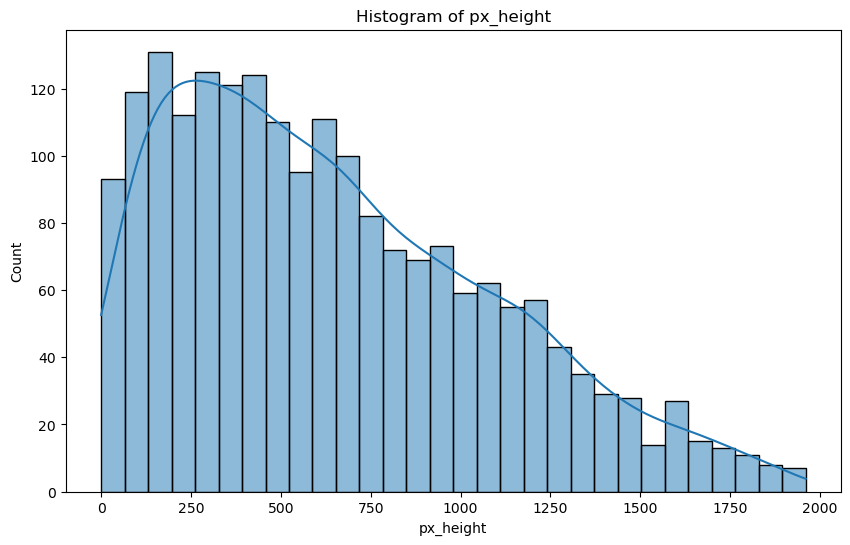

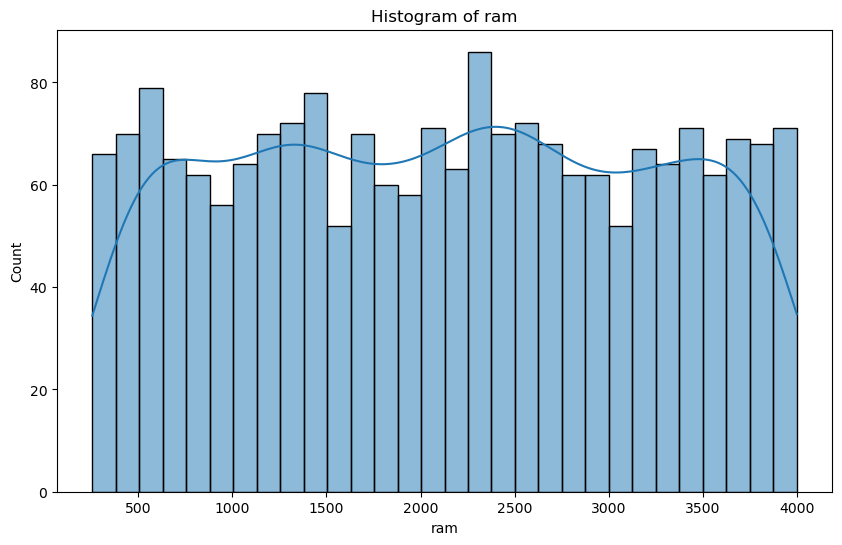

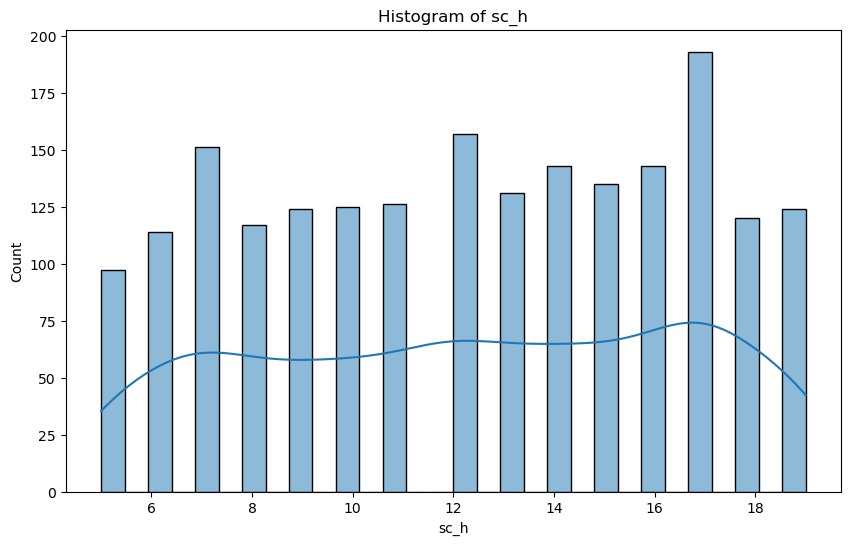

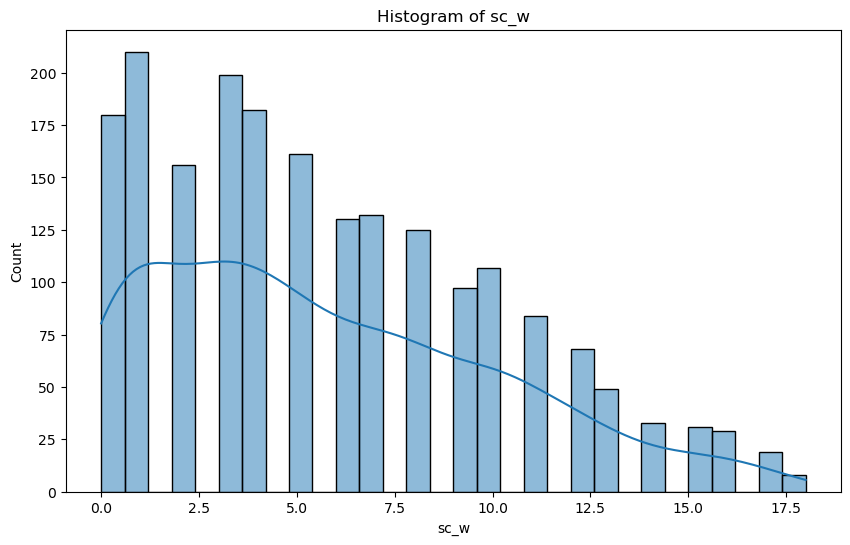

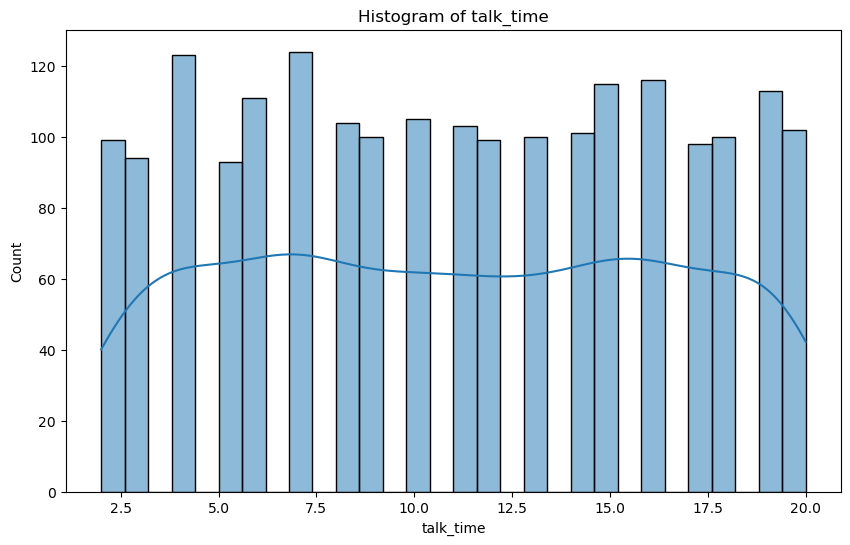

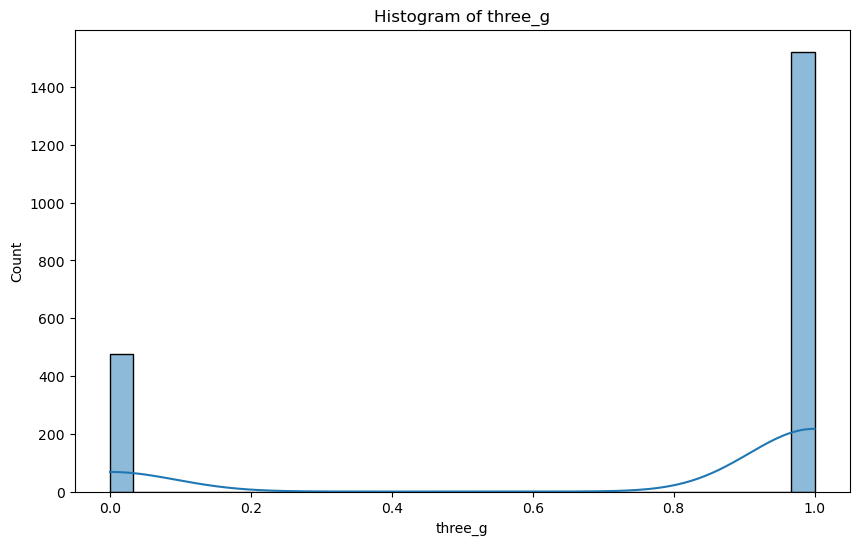

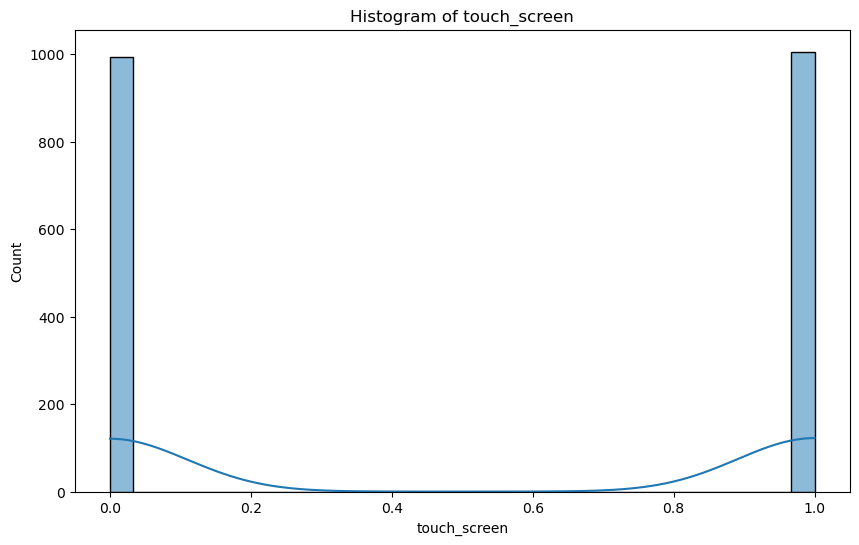

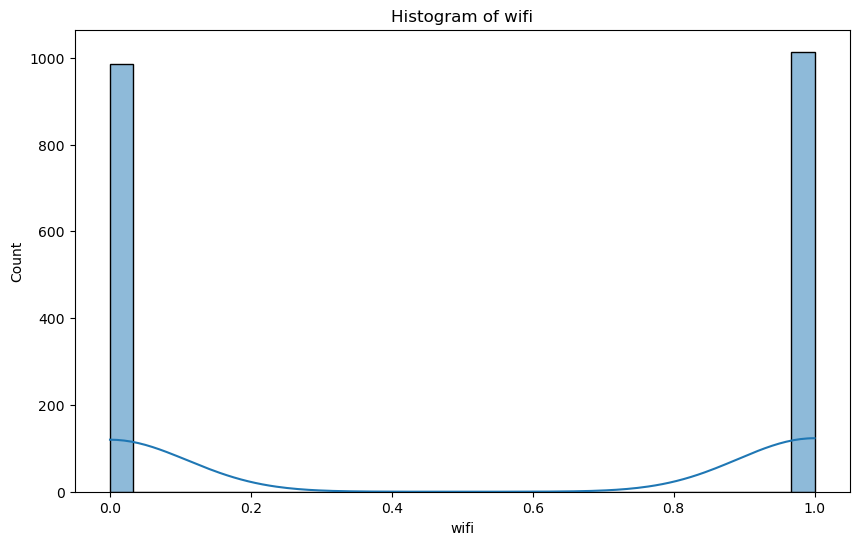

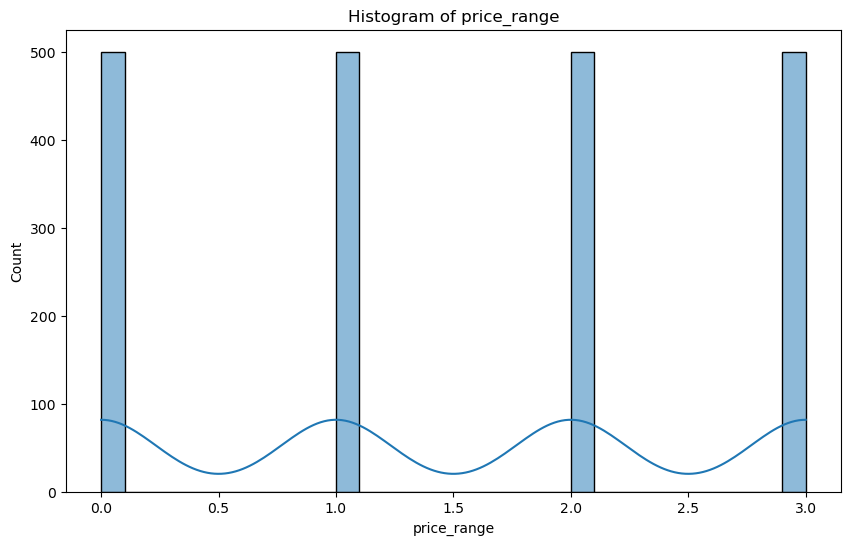

In [15]:
for column in columns:
    plt.figure(figsize=(10,6))
    sns.histplot(cp[column],bins=30, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()


## Bivariate Analysis

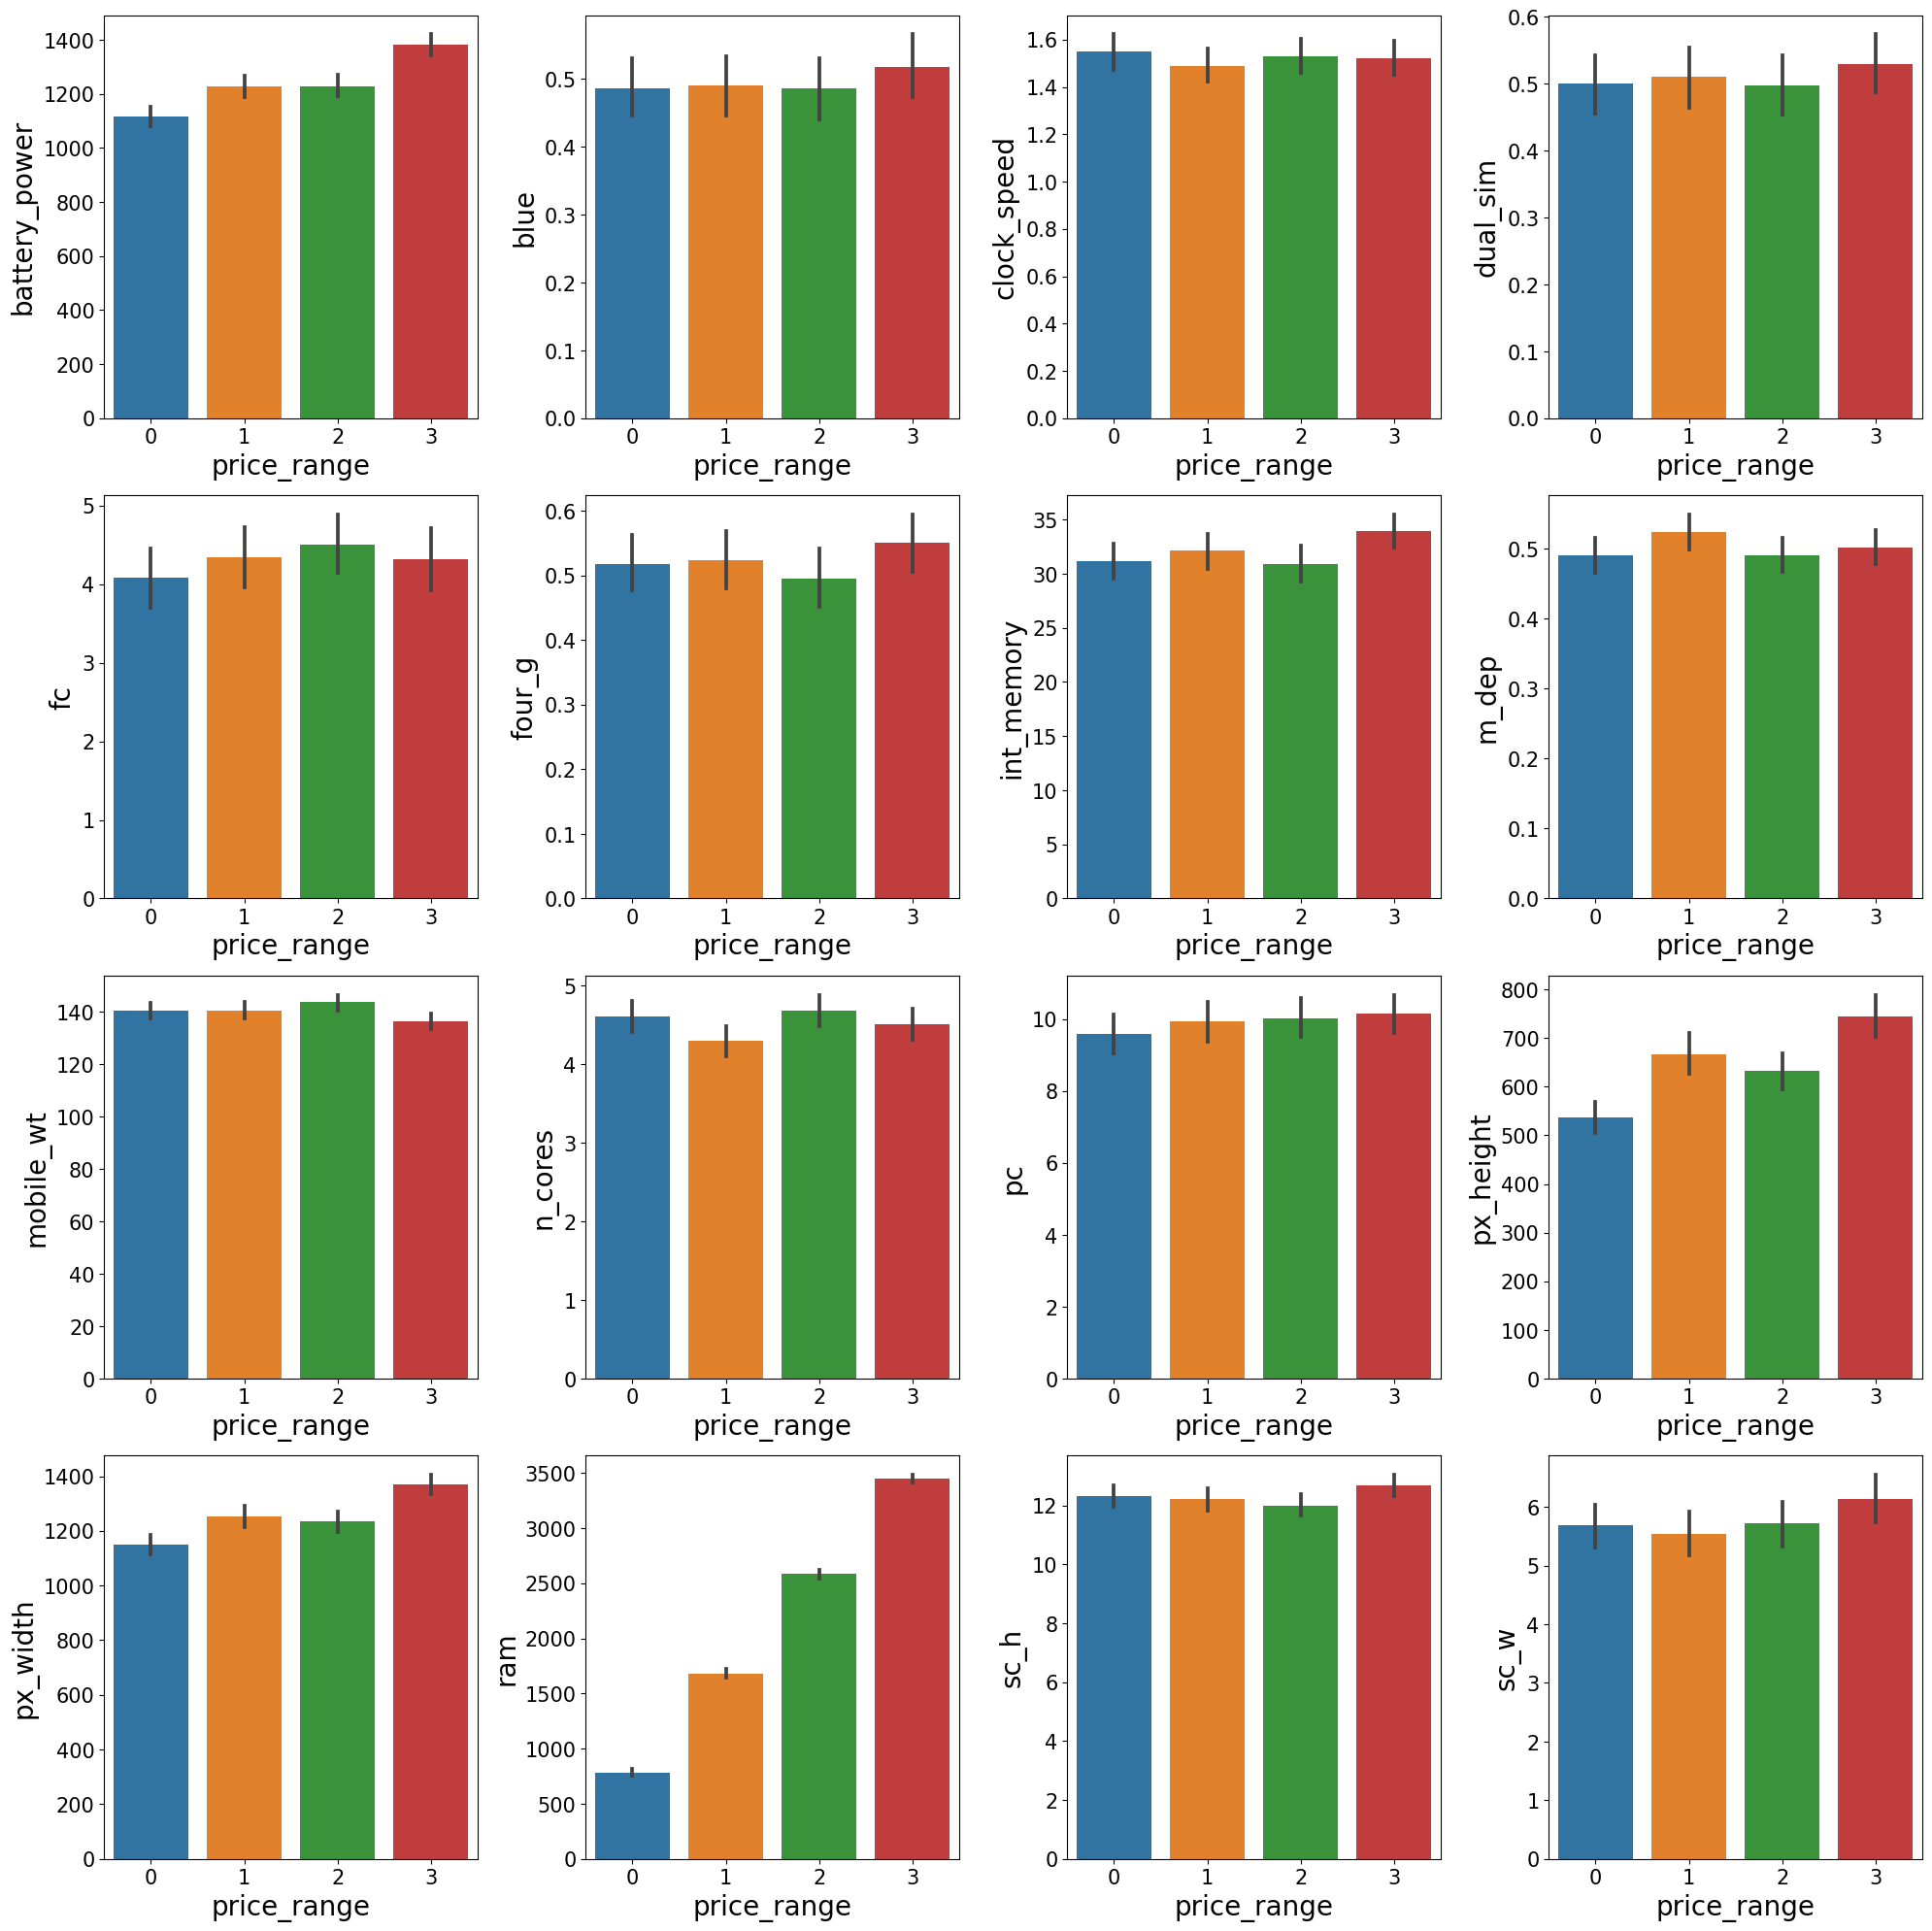

In [16]:
# Assuming cp is a DataFrame and you want to plot multiple barplots
cp_columns = cp.columns  # Get all columns from cp

num_plots = len(cp_columns)  # Determine how many plots you need
rows = 4
cols = 4

# Ensure we don't try to create more subplots than the grid can handle
num_subplots = min(num_plots, rows * cols)

# Create a figure and iterate over the columns to plot
fig = plt.figure(figsize=(20, 20))  # Adjust size as needed
for i in range(num_subplots):
    ax = fig.add_subplot(rows, cols, i+1)  # i+1 because subplot indexes start from 1
    sns.barplot(x=cp.price_range, y=cp[cp_columns[i]], ax=ax)
    ax.set_xlabel('price_range', fontsize=20)
    ax.set_ylabel(cp_columns[i], fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=15)

plt.tight_layout()  # Ensure tight layout to prevent overlap
plt.show()

In [17]:
cp

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [18]:
pd.set_option('display.max_columns',None)
cp

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


<Axes: >

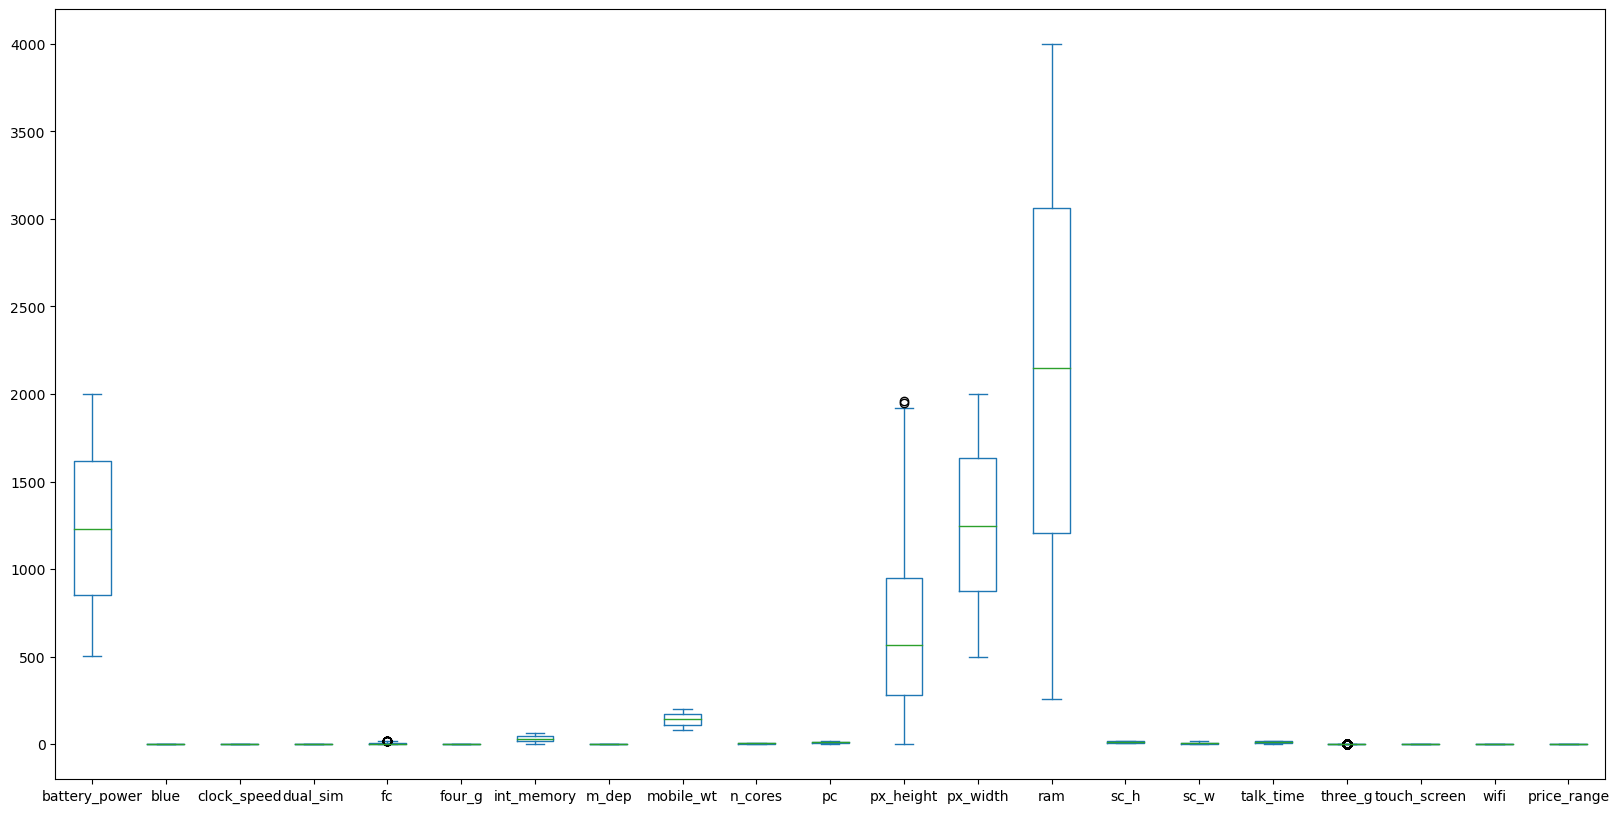

In [19]:
cp.plot(kind='box',figsize=(20,10))

### Identifying Outliers using Z score

In [20]:
# for 'fc' column
from scipy.stats import zscore

# Calculate z-scores for the numerical column
z_scores = zscore(cp['fc'])


In [21]:
threshold = 3  # Adjust as needed.
outliers_z = cp[abs(z_scores) > threshold]


In [22]:
#Define outliers as data points that have a z-score greater than a threshold 
#(typically |z-score| > 3 is used for extreme outliers 

### Calculating Percentage

In [23]:
percentage_outliers_z = (len(outliers_z) / len(cp)) * 100
print(f"Percentage of outliers (Z-Score method): {percentage_outliers_z:.2f}%")


Percentage of outliers (Z-Score method): 0.60%


In [24]:
# for 'px_height' column
from scipy.stats import zscore

# Calculate z-scores for the numerical column
z_scores = zscore(cp['px_height'])


In [25]:
threshold = 3  # Adjust as needed
outliers_z = cp[abs(z_scores) > threshold]

In [26]:
percentage_outliers_z = (len(outliers_z) / len(cp)) * 100
print(f"Percentage of outliers (Z-Score method): {percentage_outliers_z:.2f}%")

Percentage of outliers (Z-Score method): 0.00%


In [27]:
# for 'three_g' column
from scipy.stats import zscore

# Calculate z-scores for the numerical column
z_scores = zscore(cp['three_g'])


In [28]:
threshold = 3  # Adjust as needed
outliers_z = cp[abs(z_scores) > threshold]

In [29]:
percentage_outliers_z = (len(outliers_z) / len(cp)) * 100
print(f"Percentage of outliers (Z-Score method): {percentage_outliers_z:.2f}%")

Percentage of outliers (Z-Score method): 0.00%


In [32]:
X_feature = cp.drop(columns='price_range')

Y_feature = cp['price_range']

# Feature selection

In [33]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X_feature, Y_feature)

ExtraTreesRegressor()

In [34]:
print(selection.feature_importances_)

[0.05328826 0.00191136 0.00230895 0.00222953 0.00243072 0.00199441
 0.0028247  0.00325883 0.00422974 0.00311837 0.00287409 0.02516483
 0.02713615 0.85350795 0.00277808 0.00292442 0.00278407 0.00149049
 0.00193834 0.00180668]


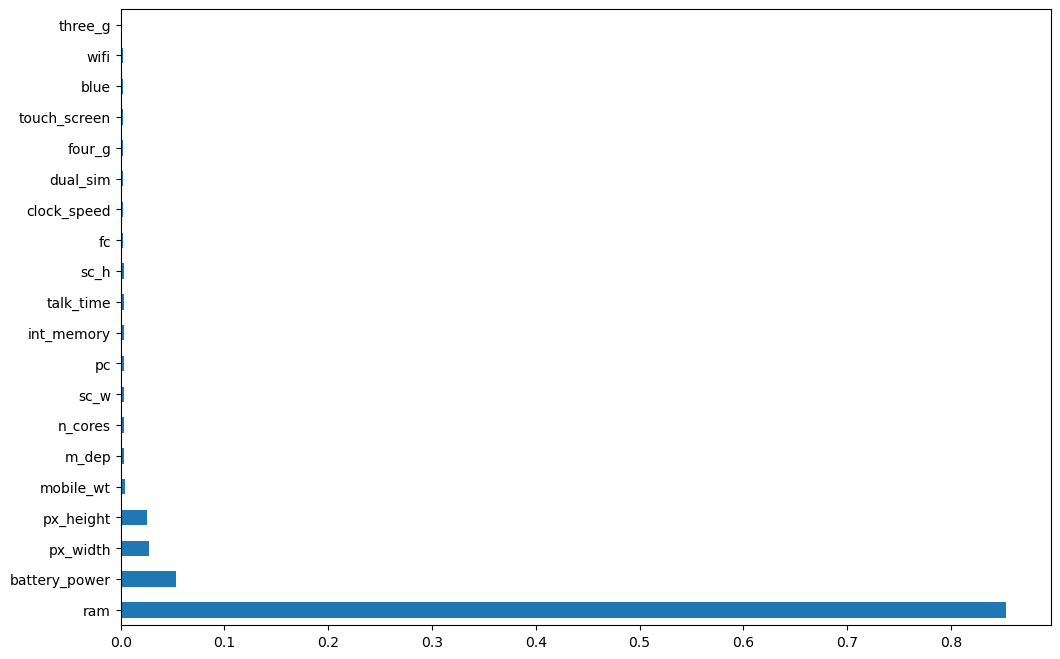

In [35]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X_feature.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [84]:
X= cp.drop(['blue','dual_sim','clock_speed','m_dep','three_g','touch_screen','sc_h','sc_w','dual_sim','n_cores','wifi','price_range'],axis=1)
Y= cp['price_range']

In [37]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3, random_state=42)

In [38]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(random_state=42)

Xtrain,Ytrain = smote.fit_resample(Xtrain,Ytrain)

In [39]:
Ytrain.value_counts()  # now the target is balanced to avoid bias

price_range
3    354
2    354
0    354
1    354
Name: count, dtype: int64

# Model Building - Classification
1. Logistic Regression
2. Decision tree
3. Random Forest Classifier
4. Support Vector Machine


## 1. Logistic Regression


In [43]:
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression(random_state=42)

### Hyper parameter Tuning

In [46]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_lr = {
    'penalty':['l1','l2'],
    "C":randint(0,10),
    "solver":['lblinear','saga']
    
}

randomized_lr = RandomizedSearchCV(estimator=lr, param_distributions=param_lr,n_iter=30,n_jobs=-1,
                   random_state=42,scoring='accuracy',cv=10)

In [47]:
randomized_lr.fit(Xtrain,Ytrain)

RandomizedSearchCV(cv=10, estimator=LogisticRegression(random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000028A3BB4ED90>,
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['lblinear', 'saga']},
                   random_state=42, scoring='accuracy')

In [48]:
randomized_lr.best_params_

{'C': 7, 'penalty': 'l1', 'solver': 'saga'}

# Train the model on best para meters

In [49]:
best_model_lr = randomized_lr.best_estimator_

predict_lr = best_model_lr.predict(Xtest)

# Model Evaluation
1. Accuracy
2. Confusion matrix

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Accuracy:
The accuracy of the Logistic Model: 63.5

Confusion matrix:


<Axes: >

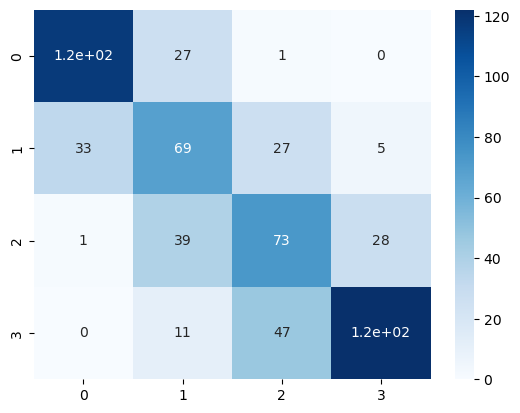

In [51]:
# Accuracy
print('Accuracy:')
accuracy_lr = accuracy_score(predict_lr, Ytest)
print('The accuracy of the Logistic Model:',accuracy_lr*100)
print()

#Confusion Matrix
print("Confusion matrix:")
cm_lr= confusion_matrix(predict_lr, Ytest)
sns.heatmap(cm_lr, cmap='Blues', annot=True)


In [52]:
# Classification report

print(classification_report(Ytest,predict_lr))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       151
           1       0.51      0.47      0.49       146
           2       0.52      0.49      0.51       148
           3       0.68      0.79      0.73       155

    accuracy                           0.64       600
   macro avg       0.63      0.63      0.63       600
weighted avg       0.63      0.64      0.63       600



## 2. Decision tree

In [53]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=42)



## hyper parameter tuning - DTC

In [54]:
param_dtc = {
    'criterion':['gini','impurity'],
    'splitter':['best','random'],
    'max_depth':randint(1,20),
    'min_samples_split':randint(1,20),
    'min_samples_leaf':randint(1,20),
    'max_features':['auto','sqrt','log2',None]
    
}

randomized_dtc = RandomizedSearchCV(estimator=dtc, param_distributions=param_dtc,n_iter=30, n_jobs=-1,
                                   random_state=42,cv=10, verbose=1)

In [55]:
randomized_dtc.fit(Xtrain,Ytrain)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'impurity'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000028A3C14B9D0>,
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000028A3BC3A510>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000028A3BC6B510>,
                                        'splitter': ['best', 'random']},
                   random_state=42, verbose=1)

In [56]:
randomized_dtc.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'min_samples_leaf': 16,
 'min_samples_split': 15,
 'splitter': 'random'}

In [57]:
best_model_dtc = randomized_dtc.best_estimator_  # Train the model on best parameters


predict_dtc = best_model_dtc.predict(Xtest)

Accuracy:
The accuracy of the Decision tree Model: 78.83333333333333

Confusion matrix:


<Axes: >

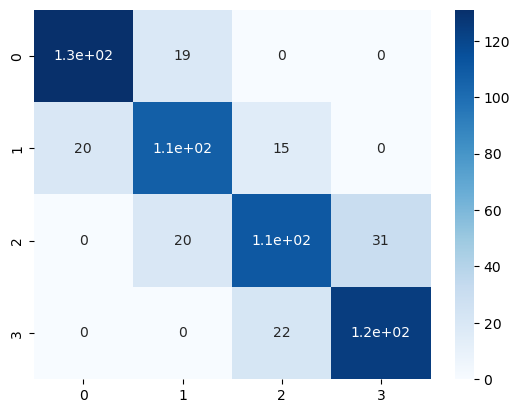

In [58]:
# Accuracy
print('Accuracy:')
accuracy_dtc = accuracy_score(predict_dtc, Ytest)
print('The accuracy of the Decision tree Model:',accuracy_dtc*100)
print()

#Confusion Matrix
print("Confusion matrix:")
cm_dtc= confusion_matrix(predict_dtc, Ytest)
sns.heatmap(cm_dtc, cmap='Blues', annot=True)


In [59]:
# Classification report

print(classification_report(Ytest,predict_dtc))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       151
           1       0.75      0.73      0.74       146
           2       0.69      0.75      0.72       148
           3       0.85      0.80      0.82       155

    accuracy                           0.79       600
   macro avg       0.79      0.79      0.79       600
weighted avg       0.79      0.79      0.79       600



## 3. Random Forest classifier

In [60]:
from sklearn.ensemble import RandomForestClassifier


rfc = RandomForestClassifier(random_state=42)

In [61]:

param_rfc = {
    
    "n_estimators":randint(50,200),
    'max_depth' : randint(10,50),
    'min_samples_split':randint(1,20),
    'min_samples_leaf':randint(1,20),
    'max_features':['auto','sqrt','log2',None],
    'bootstrap':[True,False]
}

randomized_rfc = RandomizedSearchCV(estimator=rfc, param_distributions=param_rfc, n_iter=30, n_jobs=-1,
                                    cv=10,verbose=1, random_state=42, scoring='accuracy') 

randomized_rfc.fit(Xtrain, Ytrain)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000028A3C191290>,
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000028A3C167390>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000028A3C1D2190>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000028A3C1C99D0>},
                   random_state=42, scoring='accuracy', verbose=1)

In [62]:
randomized_rfc.best_params_

{'bootstrap': False,
 'max_depth': 36,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 150}

In [63]:
best_model_rfc = randomized_rfc.best_estimator_

In [67]:
predict_rfc = best_model_rfc.predict(Xtest)
predict_rfc


array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 1, 2, 3, 2, 2, 3, 3, 1, 0, 0, 1,
       1, 2, 0, 1, 3, 2, 2, 0, 0, 0, 3, 0, 1, 1, 2, 0, 3, 0, 2, 3, 2, 0,
       2, 2, 2, 1, 3, 1, 3, 1, 0, 0, 0, 0, 1, 3, 0, 0, 0, 3, 3, 1, 0, 0,
       3, 3, 1, 2, 2, 3, 0, 1, 2, 0, 0, 3, 2, 1, 3, 2, 1, 0, 1, 3, 2, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 1, 1, 0, 0, 1, 0, 0, 3, 2, 0, 1, 1,
       0, 0, 3, 1, 2, 2, 3, 2, 0, 2, 1, 3, 2, 1, 3, 3, 0, 3, 0, 2, 3, 0,
       2, 2, 0, 3, 1, 0, 0, 2, 3, 0, 2, 2, 0, 0, 0, 1, 2, 2, 3, 1, 1, 0,
       2, 2, 0, 1, 0, 1, 2, 3, 3, 2, 1, 0, 1, 2, 2, 3, 3, 1, 1, 0, 3, 1,
       1, 2, 1, 0, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 0, 0, 1, 3, 3, 1, 0, 1,
       1, 1, 1, 2, 2, 2, 3, 3, 1, 2, 0, 0, 0, 2, 1, 1, 3, 1, 0, 2, 1, 1,
       3, 2, 3, 0, 0, 2, 1, 2, 0, 1, 2, 0, 2, 3, 2, 1, 1, 3, 3, 0, 1, 3,
       3, 3, 0, 3, 1, 2, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 0, 2, 2,
       2, 1, 2, 0, 2, 3, 2, 2, 2, 1, 0, 2, 0, 3, 3, 1, 3, 1, 0, 3, 1, 2,
       0, 0, 3, 0, 1, 2, 3, 3, 3, 1, 1, 0, 1, 3, 3,

Accuracy:
The accuracy of the Random forest Model: 90.33333333333333

Confusion matrix:


<Axes: >

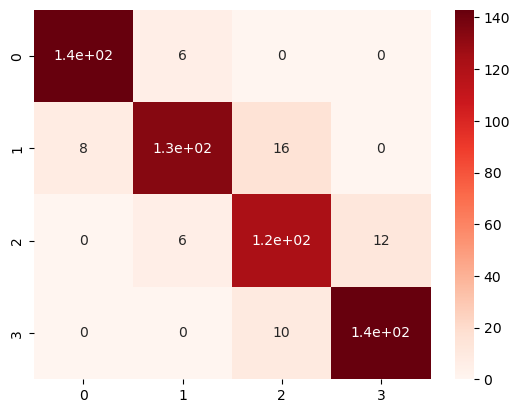

In [68]:
# Accuracy
print('Accuracy:')
accuracy_rfc = accuracy_score(predict_rfc, Ytest)
print('The accuracy of the Random forest Model:',accuracy_rfc*100)
print()

#Confusion Matrix
print("Confusion matrix:")
cm_rfc = confusion_matrix(predict_rfc, Ytest)
sns.heatmap(cm_rfc, cmap='Reds', annot=True)


In [69]:
# Classification report

print(classification_report(predict_rfc,Ytest))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       149
           1       0.92      0.85      0.88       158
           2       0.82      0.87      0.85       140
           3       0.92      0.93      0.93       153

    accuracy                           0.90       600
   macro avg       0.90      0.90      0.90       600
weighted avg       0.90      0.90      0.90       600



## 4. Support Vector Machine

In [70]:
from sklearn.svm import SVC

svm = SVC(random_state=42)

In [71]:
from sklearn.model_selection import RandomizedSearchCV

param_svm = {
    "C": [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type (removed 'poly' to simplify)
    'gamma': ['scale'],  # Kernel coefficient (removed 'auto' to simplify)
    'degree': [2, 3]  # Degree of polynomial kernel (reduced range)
}
randomized_svm = RandomizedSearchCV(estimator=svm,param_distributions=param_svm,
                                    random_state=42, cv = 3 ,n_jobs=-1,scoring='accuracy')

randomized_svm.fit(Xtrain, Ytrain)

RandomizedSearchCV(cv=3, estimator=SVC(random_state=42), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10], 'degree': [2, 3],
                                        'gamma': ['scale'],
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='accuracy')

In [77]:
# training the model on hyper para meters
best_param_svm = randomized_svm.best_params_


best_param_svm

{'kernel': 'linear', 'gamma': 'scale', 'degree': 3, 'C': 10}

In [78]:
best_model_svm = randomized_svm.best_estimator_
best_model_svm

SVC(C=10, kernel='linear', random_state=42)

In [80]:
predict_svm = best_model_svm.predict(Xtest)
predict_svm

array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 1, 2, 3, 3, 2, 3, 3, 1, 0, 0, 2,
       1, 2, 0, 1, 3, 2, 2, 0, 0, 0, 3, 0, 1, 1, 2, 0, 3, 0, 2, 3, 2, 0,
       2, 3, 2, 1, 3, 1, 3, 1, 0, 0, 1, 1, 1, 3, 0, 0, 1, 3, 3, 1, 0, 0,
       3, 3, 1, 2, 2, 2, 0, 1, 2, 0, 1, 3, 2, 2, 3, 2, 1, 0, 1, 3, 1, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 1, 1, 0, 0, 1, 0, 1, 3, 2, 0, 1, 1,
       0, 0, 3, 1, 3, 2, 3, 2, 0, 2, 1, 3, 2, 1, 3, 3, 0, 2, 0, 2, 3, 0,
       2, 2, 0, 3, 1, 0, 0, 2, 2, 1, 2, 2, 0, 0, 0, 1, 1, 2, 3, 1, 1, 0,
       2, 2, 0, 1, 0, 2, 2, 3, 3, 3, 1, 0, 1, 2, 2, 3, 3, 0, 1, 0, 3, 1,
       1, 2, 1, 0, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 0, 0, 1, 3, 3, 1, 0, 1,
       1, 1, 1, 2, 2, 3, 3, 3, 1, 2, 0, 0, 0, 2, 1, 1, 3, 1, 1, 2, 1, 1,
       3, 2, 3, 0, 0, 2, 1, 3, 0, 1, 2, 0, 2, 3, 2, 0, 1, 3, 3, 0, 1, 3,
       3, 3, 0, 3, 1, 2, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 0, 1, 2,
       3, 2, 3, 0, 2, 3, 2, 2, 2, 1, 0, 1, 0, 3, 3, 1, 3, 1, 1, 3, 1, 2,
       0, 0, 3, 0, 1, 2, 3, 3, 3, 1, 1, 0, 1, 3, 3,

Accuracy:
The accuracy of the Support Vector machine: 97.0

Confusion matrix:


<Axes: >

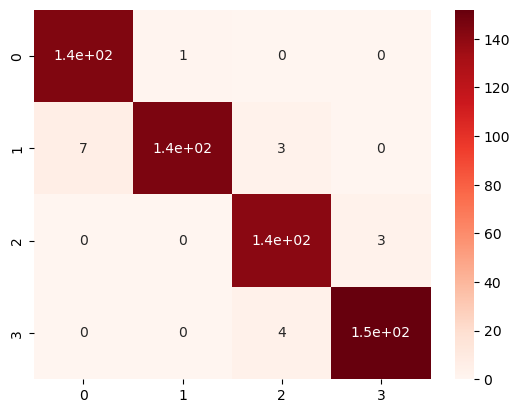

In [74]:
# Accuracy
print('Accuracy:')
accuracy_svm = accuracy_score(predict_svm, Ytest)
print('The accuracy of the Support Vector machine:',accuracy_svm*100)
print()

#Confusion Matrix
print("Confusion matrix:")
cm_svm = confusion_matrix(predict_svm, Ytest)
sns.heatmap(cm_svm, cmap='Reds', annot=True)


In [75]:
# Classification report

print(classification_report(predict_svm,Ytest))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       145
           1       0.99      0.94      0.96       155
           2       0.95      0.98      0.97       144
           3       0.98      0.97      0.98       156

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600



## Comapring the accuracies of the models

In [76]:
print('The accuracy of the Logistic regression Model:',accuracy_lr*100)
print('The accuracy of the Decision Tree Model:',accuracy_dtc*100)
print('The accuracy of the Random forest Model:',accuracy_rfc*100)
print('The accuracy of the Support vector Machine:',accuracy_svm*100)


The accuracy of the Logistic regression Model: 63.5
The accuracy of the Decision Tree Model: 78.83333333333333
The accuracy of the Random forest Model: 90.33333333333333
The accuracy of the Support vector Machine: 97.0


Text(0.5, 1.0, 'Accuracy score of diff models')

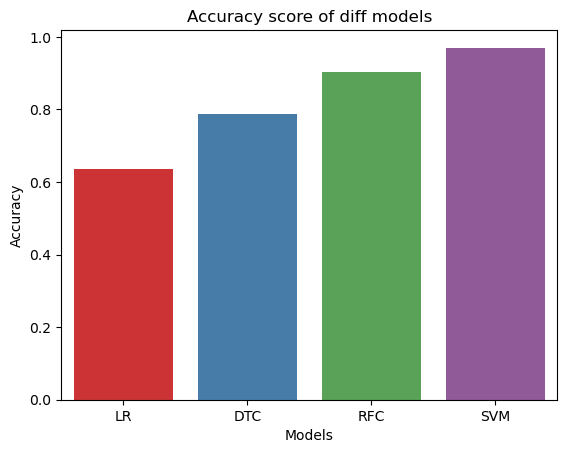

In [82]:
final_scores = pd.DataFrame({"Models":["LR","DTC","RFC", 'SVM'], 
                                 'Accuracy':[accuracy_lr,accuracy_dtc,accuracy_rfc, accuracy_svm]})

sns.barplot(x=final_scores['Models'], y=final_scores["Accuracy"], palette='Set1')
plt.title("Accuracy score of diff models")


In [87]:
# Saving the Model
rfc_final = randomized_rfc.best_estimator_
filename = 'rfc.pkl'
pickle.dump(rfc_final, open(filename, 'wb'))

# Loading and Testing the Saved Model
loaded_model = pickle.load(open('rfc.pkl', 'rb'))
final_prediction = loaded_model.predict(Xtest)

    

In [86]:
X.columns

Index(['battery_power', 'fc', 'four_g', 'int_memory', 'mobile_wt', 'pc',
       'px_height', 'px_width', 'ram', 'talk_time'],
      dtype='object')